# Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import  confusion_matrix, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


the meaning of some of the column headers are not obvious. Here's what they mean,

age: The person's age in years<br>
sex: The person's sex (1 = male, 0 = female)<br>
cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)<br>
trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)<br>
chol: The person's cholesterol measurement in mg/dl<br>
fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)<br>
restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)<br>
thalach: The person's maximum heart rate achieved<br>
exang: Exercise induced angina (1 = yes; 0 = no)<br>
oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)<br>
slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)<br>
ca: The number of major vessels (0-4)<br>
thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)<br>
target: Heart disease (0 = no, 1 = yes)<br>

# EDA

In [3]:
df.shape

(303, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.nunique

<bound method DataFrame.nunique of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1 

In [8]:
# We can rearrange the columns just for simplification
df.columns = ['age', 'sex', 'chest_pain_type', 'resisting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 
               'rest_ecg', 'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression', 'st_slope', 
               'num_major_vessels', 'thalassemia', 'target']
df.head()

,age,sex,chest_pain_type,resisting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
for column in df.columns:
    print(column, ' unique valaues : ', df[column].unique())

age  unique valaues :  [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex  unique valaues :  [1 0]
chest_pain_type  unique valaues :  [3 2 1 0]
resisting_blood_pressure  unique valaues :  [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
cholesterol  unique valaues :  [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274

In [10]:
#change column names just for simplification
df.sex = df.sex.replace(to_replace=[1,0], value=['male', 'female'])
df.chest_pain_type = df.chest_pain_type.replace(to_replace =[0,1,2,3], value=['typical angina','atypical angina','non-anginal pain','asymptomatic'])
df.fasting_blood_sugar = df.fasting_blood_sugar.replace(to_replace=[0,1], value=['lower than 120mg/ml', 'higher than 120mg/ml'])
df.rest_ecg = df.rest_ecg.replace(to_replace=[0,1,2], value=['normal', 'ST-T wave abnormality', 'left ventricular hypertrophy'])
df.exercise_induced_angina = df.exercise_induced_angina.replace(to_replace=[0,1], value=['no', 'yes'])
df.st_slope = df.st_slope.replace(to_replace=[0,1,2], value=['upsloping', 'flat', 'downsloping'])
df.thalassemia = df.thalassemia.replace(to_replace=[1,2,3], value=['normal', 'fixed defect','reversable defect'])

In [11]:
df.head()

,age,sex,chest_pain_type,resisting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,male,asymptomatic,145,233,higher than 120mg/ml,normal,150,no,2.3,upsloping,0,normal,1
1,37,male,non-anginal pain,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,upsloping,0,fixed defect,1
2,41,female,atypical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,downsloping,0,fixed defect,1
3,56,male,atypical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,downsloping,0,fixed defect,1
4,57,female,typical angina,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,downsloping,0,fixed defect,1


<Axes: xlabel='rest_ecg', ylabel='count'>

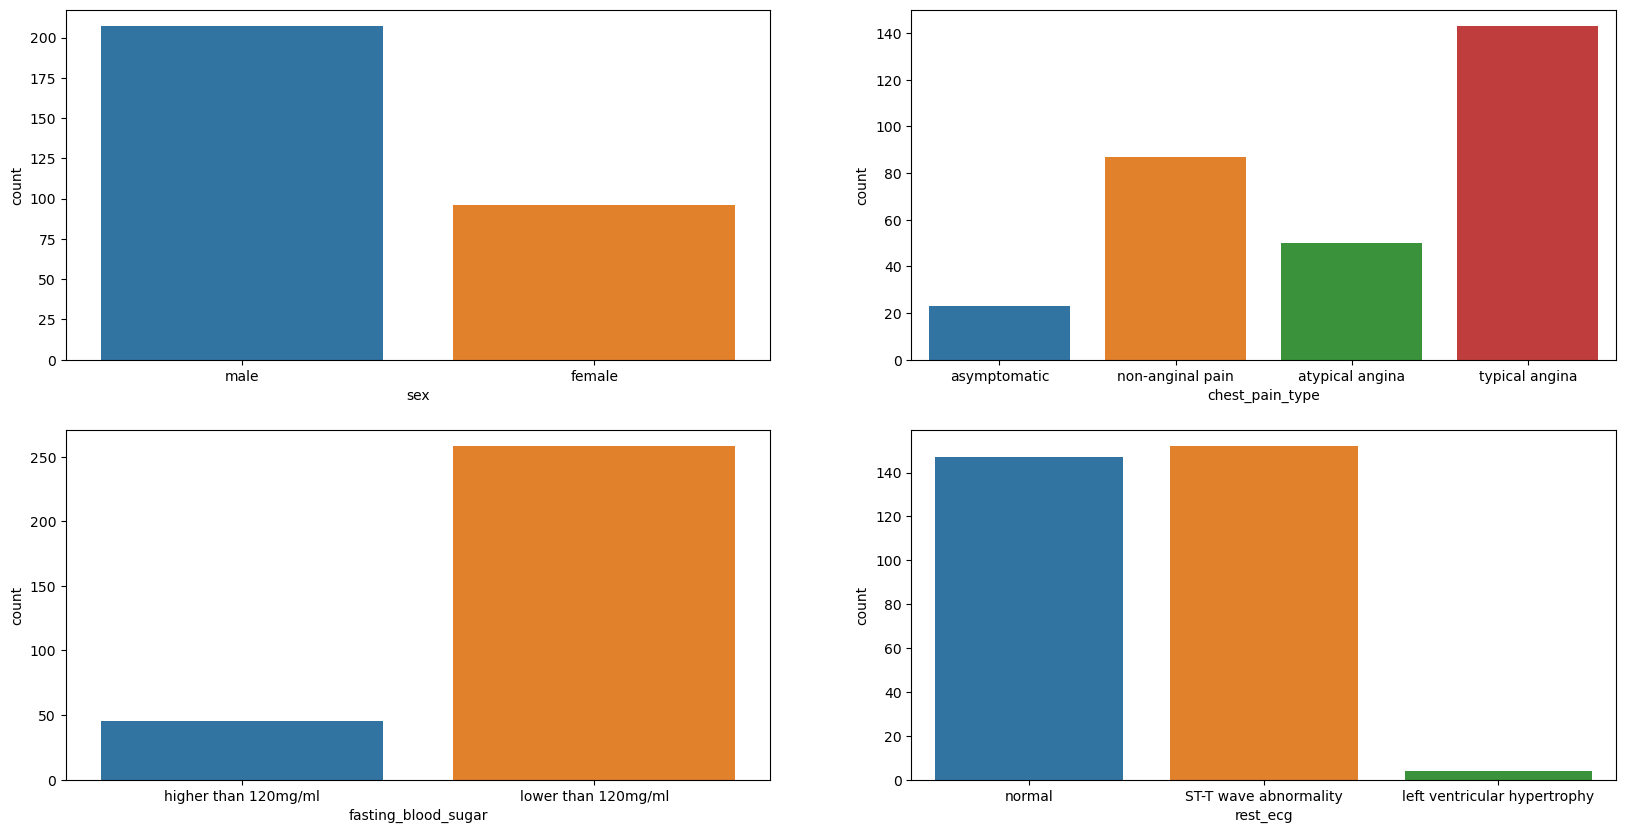

In [12]:
# Let's visualize counts
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
sns.countplot(x=df.sex)

plt.subplot(2,2,2)
sns.countplot(x=df.chest_pain_type)

plt.subplot(2,2,3)
sns.countplot(x=df.fasting_blood_sugar)

plt.subplot(2,2,4)
sns.countplot(x=df.rest_ecg)

<function matplotlib.pyplot.show(close=None, block=None)>

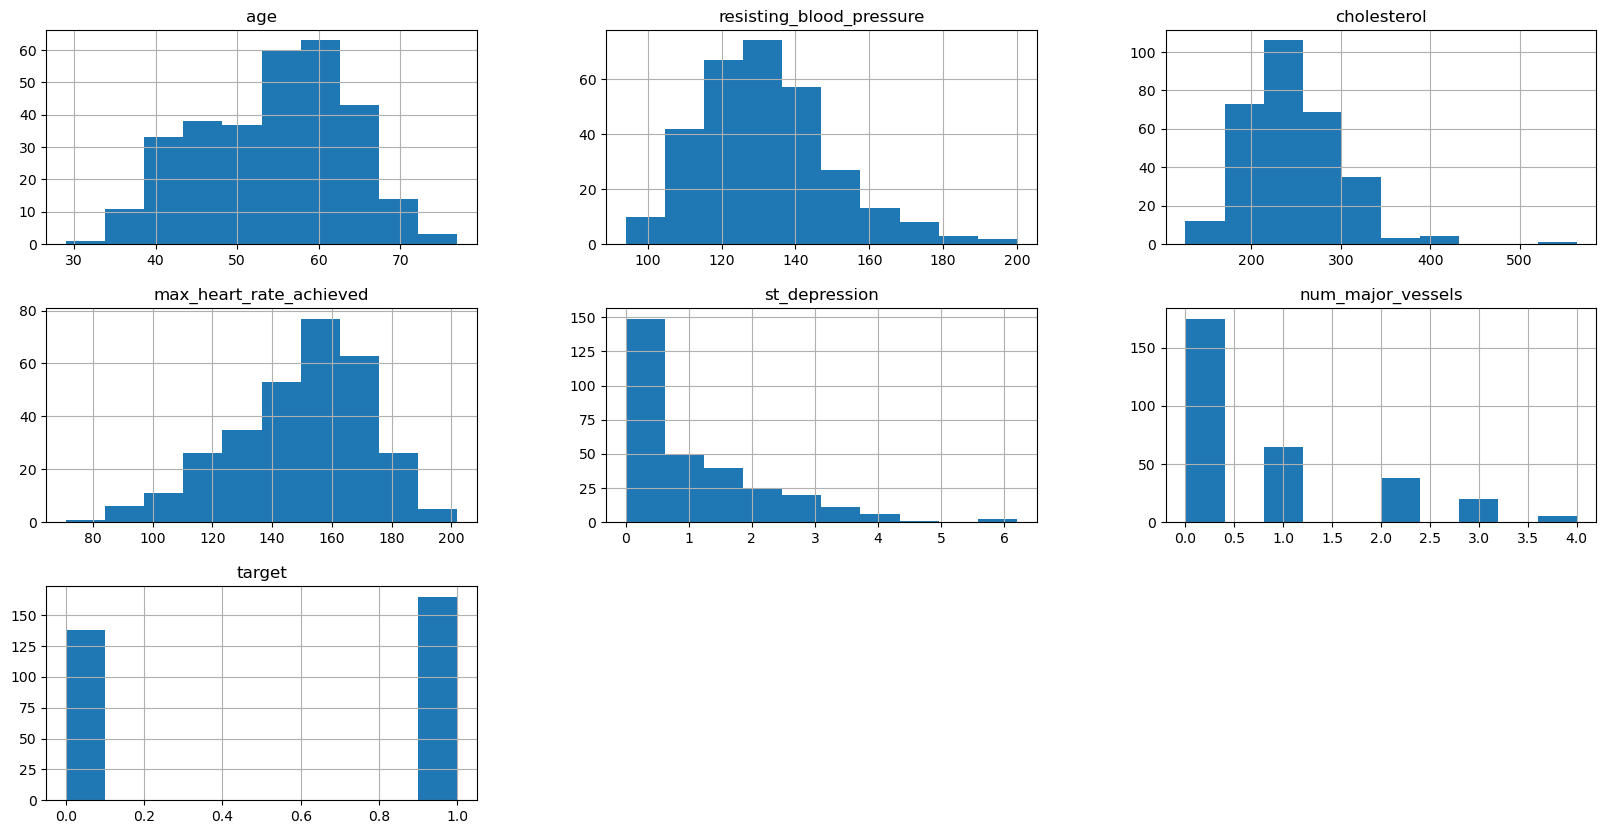

In [13]:
df.hist(figsize=(20,10))
plt.show

<Axes: xlabel='age'>

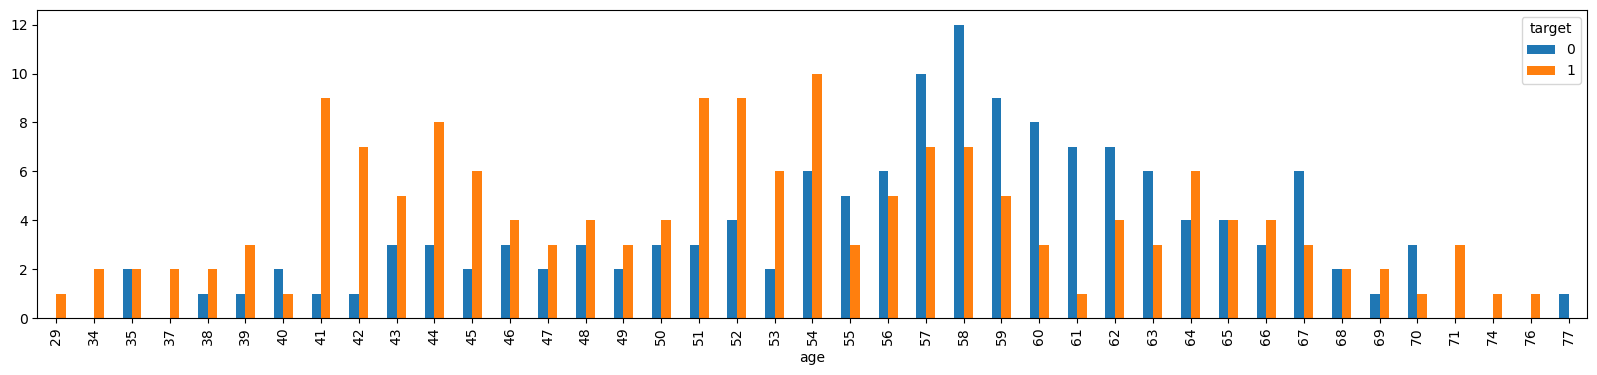

In [14]:
#visualize age

pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,4))

<Axes: >

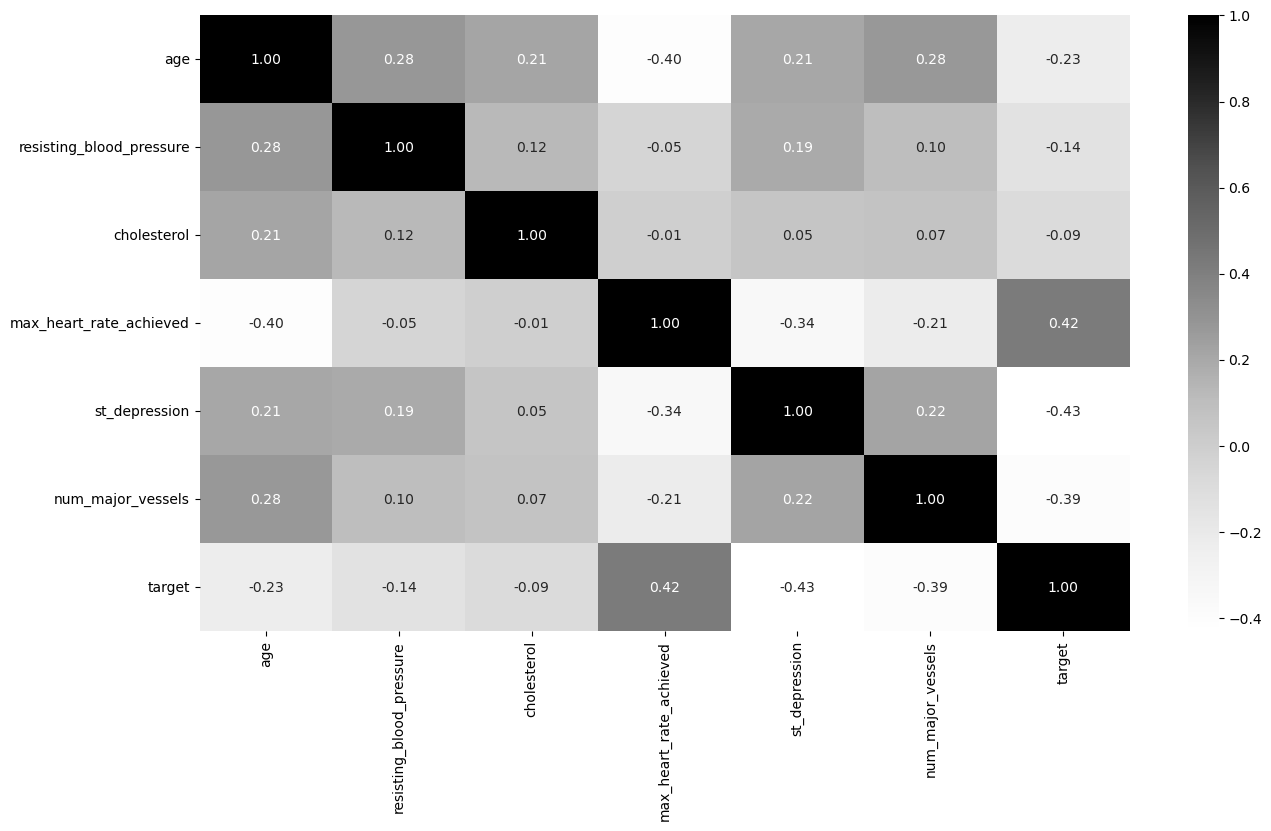

In [15]:
# see correalation and heatmap
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='Greys')

# Data Preprocessing

In [16]:
#apply one hot encoder
encoded= pd.get_dummies(df, drop_first=True)

In [17]:
encoded.head()

,age,resisting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,target,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_lower than 120mg/ml,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect
0,63,145,233,150,2.3,0,1,1,0,0,0,0,0,1,0,0,1,0,1,0
1,37,130,250,187,3.5,0,1,1,0,1,0,1,0,0,0,0,1,1,0,0
2,41,130,204,172,1.4,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0
3,56,120,236,178,0.8,0,1,1,1,0,0,1,0,0,0,0,0,1,0,0
4,57,120,354,163,0.6,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0


In [18]:
#scalling & normalization
featurecol = encoded.drop('target',axis=1)
scaler = StandardScaler()

scaled_features = scaler.fit_transform(featurecol)

scaled_df = pd.DataFrame(scaled_features, columns=featurecol.columns)


scaled_df['target'] = df['target']

In [19]:
scaled_df.head(10)

,age,resisting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_lower than 120mg/ml,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect,target
0,0.952197,0.763956,-0.256334,0.015443,1.087338,-0.714429,0.681005,-0.444554,-0.634648,-0.945384,-2.394438,-0.115663,1.030158,-0.696631,-0.926766,3.664502,-1.100763,3.979112,-0.793116,1
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,-0.714429,0.681005,-0.444554,1.575677,-0.945384,0.417635,-0.115663,-0.970725,-0.696631,-0.926766,3.664502,0.908461,-0.251312,-0.793116,1
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,-0.714429,-1.468418,2.249444,-0.634648,-0.945384,0.417635,-0.115663,1.030158,-0.696631,-0.926766,-0.272888,0.908461,-0.251312,-0.793116,1
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,-0.714429,0.681005,2.249444,-0.634648,-0.945384,0.417635,-0.115663,-0.970725,-0.696631,-0.926766,-0.272888,0.908461,-0.251312,-0.793116,1
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,-0.714429,-1.468418,-0.444554,-0.634648,1.057772,0.417635,-0.115663,-0.970725,1.435481,-0.926766,-0.272888,0.908461,-0.251312,-0.793116,1
5,0.290464,0.478391,-1.048678,-0.072018,-0.551783,-0.714429,0.681005,-0.444554,-0.634648,1.057772,0.417635,-0.115663,-0.970725,-0.696631,1.079021,-0.272888,-1.100763,3.979112,-0.793116,1
6,0.180175,0.478391,0.922521,0.146634,0.224643,-0.714429,-1.468418,2.249444,-0.634648,-0.945384,0.417635,-0.115663,1.030158,-0.696631,1.079021,-0.272888,0.908461,-0.251312,-0.793116,1
7,-1.143291,-0.663867,0.323431,1.021244,-0.896862,-0.714429,0.681005,2.249444,-0.634648,-0.945384,0.417635,-0.115663,-0.970725,-0.696631,-0.926766,-0.272888,-1.100763,-0.251312,1.260850,1
8,-0.260980,2.306004,-0.913400,0.540209,-0.465514,-0.714429,0.681005,-0.444554,1.575677,-0.945384,-2.394438,-0.115663,-0.970725,-0.696631,-0.926766,-0.272888,-1.100763,-0.251312,1.260850,1
9,0.290464,1.049520,-1.512490,1.064975,0.483451,-0.714429,0.681005,-0.444554,1.575677,-0.945384,0.417635,-0.115663,-0.970725,-0.696631,-0.926766,-0.272888,0.908461,-0.251312,-0.793116,1


In [20]:
scaled_df.tail(10)

,age,resisting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_lower than 120mg/ml,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect,target
293,1.393352,1.163746,-0.662169,0.015443,-0.206705,-0.714429,0.681005,-0.444554,1.575677,-0.945384,0.417635,-0.115663,1.030158,-0.696631,1.079021,-0.272888,-1.100763,-0.251312,1.260850,0
294,-1.143291,-0.663867,-1.493165,-0.246940,1.518686,-0.714429,0.681005,-0.444554,-0.634648,1.057772,0.417635,-0.115663,-0.970725,1.435481,-0.926766,3.664502,-1.100763,3.979112,-0.793116,0
295,0.952197,0.478391,-1.145306,-0.246940,2.553921,1.244593,0.681005,-0.444554,-0.634648,1.057772,0.417635,-0.115663,1.030158,1.435481,-0.926766,-0.272888,-1.100763,-0.251312,1.260850,0
296,0.952197,-0.435415,-0.952051,-0.596784,-0.896862,-0.714429,-1.468418,-0.444554,-0.634648,1.057772,0.417635,-0.115663,-0.970725,1.435481,1.079021,-0.272888,0.908461,-0.251312,-0.793116,0
297,0.511041,1.849101,-1.357886,-2.608388,-0.034166,1.244593,0.681005,-0.444554,-0.634648,1.057772,-2.394438,-0.115663,1.030158,-0.696631,1.079021,-0.272888,-1.100763,3.979112,-0.793116,0
298,0.290464,0.478391,-0.101730,-1.165281,-0.724323,-0.714429,-1.468418,-0.444554,-0.634648,1.057772,0.417635,-0.115663,-0.970725,1.435481,1.079021,-0.272888,-1.100763,-0.251312,1.260850,0
299,-1.033002,-1.234996,0.342756,-0.771706,0.138373,-0.714429,0.681005,-0.444554,-0.634648,-0.945384,0.417635,-0.115663,-0.970725,-0.696631,1.079021,-0.272888,-1.100763,-0.251312,1.260850,0
300,1.503641,0.706843,-1.029353,-0.378132,2.036303,1.244593,0.681005,-0.444554,-0.634648,1.057772,-2.394438,-0.115663,-0.970725,-0.696631,1.079021,-0.272888,-1.100763,-0.251312,1.260850,0
301,0.290464,-0.092738,-2.227533,-1.515125,0.138373,0.265082,0.681005,-0.444554,-0.634648,1.057772,0.417635,-0.115663,-0.970725,1.435481,1.079021,-0.272888,-1.100763,-0.251312,1.260850,0
302,0.290464,-0.092738,-0.198357,1.064975,-0.896862,0.265082,-1.468418,2.249444,-0.634648,-0.945384,0.417635,-0.115663,1.030158,-0.696631,1.079021,-0.272888,0.908461,-0.251312,-0.793116,0


In [21]:
# i think that data is not shuffuled 
# if we see the target colomn the first 10 are all 1 and last 10 is 0
# let's shuffle
shufdf=scaled_df.sample(frac=1,random_state=100)

In [22]:
shufdf.head()

,age,resisting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_lower than 120mg/ml,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect,target
69,0.841908,-0.435415,-0.720145,0.583939,-0.896862,-0.714429,-1.468418,-0.444554,-0.634648,1.057772,0.417635,-0.115663,-0.970725,-0.696631,-0.926766,-0.272888,0.908461,-0.251312,-0.793116,1
300,1.503641,0.706843,-1.029353,-0.378132,2.036303,1.244593,0.681005,-0.444554,-0.634648,1.057772,-2.394438,-0.115663,-0.970725,-0.696631,1.079021,-0.272888,-1.100763,-0.251312,1.260850,0
220,0.952197,1.049520,3.106300,0.190365,2.553921,2.224104,-1.468418,-0.444554,-0.634648,1.057772,0.417635,-0.115663,1.030158,-0.696631,1.079021,-0.272888,-1.100763,-0.251312,1.260850,0
134,-1.474158,-0.321189,1.154427,0.583939,-0.896862,-0.714429,-1.468418,2.249444,-0.634648,-0.945384,0.417635,-0.115663,-0.970725,-0.696631,-0.926766,-0.272888,0.908461,-0.251312,-0.793116,1
7,-1.143291,-0.663867,0.323431,1.021244,-0.896862,-0.714429,0.681005,2.249444,-0.634648,-0.945384,0.417635,-0.115663,-0.970725,-0.696631,-0.926766,-0.272888,-1.100763,-0.251312,1.260850,1


# Splitting Data

In [23]:
features = shufdf.drop('target',axis=1)
target = shufdf[['target']]

In [24]:
features.head()

,age,resisting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_lower than 120mg/ml,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect
69,0.841908,-0.435415,-0.720145,0.583939,-0.896862,-0.714429,-1.468418,-0.444554,-0.634648,1.057772,0.417635,-0.115663,-0.970725,-0.696631,-0.926766,-0.272888,0.908461,-0.251312,-0.793116
300,1.503641,0.706843,-1.029353,-0.378132,2.036303,1.244593,0.681005,-0.444554,-0.634648,1.057772,-2.394438,-0.115663,-0.970725,-0.696631,1.079021,-0.272888,-1.100763,-0.251312,1.260850
220,0.952197,1.049520,3.106300,0.190365,2.553921,2.224104,-1.468418,-0.444554,-0.634648,1.057772,0.417635,-0.115663,1.030158,-0.696631,1.079021,-0.272888,-1.100763,-0.251312,1.260850
134,-1.474158,-0.321189,1.154427,0.583939,-0.896862,-0.714429,-1.468418,2.249444,-0.634648,-0.945384,0.417635,-0.115663,-0.970725,-0.696631,-0.926766,-0.272888,0.908461,-0.251312,-0.793116
7,-1.143291,-0.663867,0.323431,1.021244,-0.896862,-0.714429,0.681005,2.249444,-0.634648,-0.945384,0.417635,-0.115663,-0.970725,-0.696631,-0.926766,-0.272888,-1.100763,-0.251312,1.260850


In [25]:
target

,target
69,1
300,0
220,0
134,1
7,1
...,...
66,1
53,1
79,1
280,0


In [26]:
X_train, X_test, y_train, y_test = train_test_split(features,target, test_size=0.25, random_state=10)

# K Nearest Neighbors 

In [48]:
knn = KNeighborsClassifier(n_neighbors=3)

In [49]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [50]:
knn.score(X_train,y_train)

0.8898678414096917

In [51]:
knn.score(X_test,y_test)

0.8157894736842105

In [52]:
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        33
           1       0.84      0.84      0.84        43

    accuracy                           0.82        76
   macro avg       0.81      0.81      0.81        76
weighted avg       0.82      0.82      0.82        76



<Axes: >

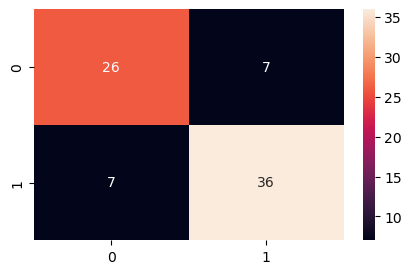

In [53]:
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,3))
sns.heatmap(cm, annot=True)

In [54]:
y_pred=knn.predict(X_test)
roc_auc_score(y_test,y_pred)

0.8125440451021847